In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from numpy import log, sqrt, exp

# code from Lab 2 (in refences)
# apply a log transformation for all x non-zero x points, else 0 
def logify(x):
    return log(x) if x else 0

In [3]:
# code from Lab 2 (in refences)

from numpy import log, log2

def sturges(x):
    return int(log2(x)) + 1

def rice(x):
    return int(2 * x ** (1/3))

def scott(large, small, sd, x):
    return int((large - small) / (3.5 * (sd/x ** (1/3))))

def freedman(large, small, iqr, x):
    return int((large - small) / (2 * (iqr/x ** (1/3))))
    
def square(x):
    return int(sqrt(x))

def logify(x):
    return log(x) if x else 0



In [4]:
dfy = pd.read_feather('../raw_data/large/yellow-2019.feather').dropna().drop('index', axis=1)

In [5]:
dfy.shape

(23688581, 19)

In [6]:
dfy.dtypes

level_0                    int64
VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [7]:
# Some Feature Engineering:

In [8]:
# Add an extra trip_duration in hours
# Since datetime is an object, convert the datatype to datetime
dfy['tpep_pickup_datetime'] = pd.to_datetime(dfy['tpep_pickup_datetime'])
dfy['tpep_dropoff_datetime'] = pd.to_datetime(dfy['tpep_dropoff_datetime'])
dfy['trip_duration'] = (dfy['tpep_dropoff_datetime'] - dfy['tpep_pickup_datetime']).dt.total_seconds()
dfy['trip_duration'] = dfy['trip_duration']/3600
dfy.head()

level_0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
68268     68268       1.0  2019-01-01 07:01:20   2019-01-31 14:29:21   
579459   579459       1.0  2019-01-03 21:43:46   2019-01-03 21:45:47   
579460   579460       1.0  2019-01-03 21:49:22   2019-01-03 21:59:12   
592224   592224       1.0  2019-01-03 22:04:40   2019-01-03 22:16:15   
592225   592225       1.0  2019-01-03 22:24:36   2019-01-27 10:41:17   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
68268               1.0            1.2         1.0                  N   
579459              1.0            0.6         1.0                  N   
579460              1.0            2.2         1.0                  N   
592224              1.0            2.5         1.0                  N   
592225              1.0            1.1         1.0                  N   

        PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
68268             48           163           2.0          6.5    0.0      0.5   
579459           263           141           1.0          4.0    0.0      0.5   
579460           263           151           1.0         10.0    0.0      0.5   
592224           238           246           1.0         11.0    0.0      0.5   
592225            50           170           1.0          8.5    0.0      0.5   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
68268         0.00           0.0                    0.3          7.30   
579459        1.50           0.0                    0.3          6.30   
579460        1.00           0.0                    0.3         11.80   
592224        2.35           0.0                    0.3         14.15   
592225        1.85           0.0                    0.3         11.15   

        congestion_surcharge  trip_duration  
68268                    0.0     727.466944  
579459                   0.0       0.033611  
579460                   0.0       0.163889  
592224                   0.0       0.193056  
592225                   0.0     564.278056

In [9]:
# trip duration and distance should be positive
# this must be done so that the distributions can be plotted without nan for average_speed
dfy = dfy[(dfy['trip_duration'] > 0)]

# trip distance shouldn't be too large: since nyc area around 302.62687 miles^2

In [10]:
# add an extra column of average speed of the taxi
dfy['average_speed'] = dfy['trip_distance']/dfy['trip_duration']
dfy.describe()

level_0      VendorID  passenger_count  trip_distance  \
count  2.366736e+07  2.366736e+07     2.366736e+07   2.366736e+07   
mean   1.671015e+07  1.643292e+00     1.560515e+00   2.984479e+00   
std    6.852225e+06  4.924095e-01     1.207759e+00   3.912168e+00   
min    6.826800e+04  1.000000e+00     0.000000e+00   0.000000e+00   
25%    1.077746e+07  1.000000e+00     1.000000e+00   9.800000e-01   
50%    1.670051e+07  2.000000e+00     1.000000e+00   1.620000e+00   
75%    2.265766e+07  2.000000e+00     2.000000e+00   3.020000e+00   
max    2.857852e+07  4.000000e+00     9.000000e+00   8.318000e+02   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  2.366736e+07  2.366736e+07  2.366736e+07  2.366736e+07  2.366736e+07   
mean   1.057951e+00  1.635002e+02  1.615689e+02  1.289108e+00  1.324824e+01   
std    6.455257e-01  6.584845e+01  7.007995e+01  4.784279e-01  8.230696e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -4.500800e+02   
25%    1.000000e+00  1.250000e+02  1.120000e+02  1.000000e+00  6.500000e+00   
50%    1.000000e+00  1.620000e+02  1.620000e+02  1.000000e+00  9.500000e+00   
75%    1.000000e+00  2.330000e+02  2.330000e+02  2.000000e+00  1.450000e+01   
max    9.900000e+01  2.650000e+02  2.650000e+02  4.000000e+00  3.958399e+05   

              extra       mta_tax    tip_amount  tolls_amount  \
count  2.366736e+07  2.366736e+07  2.366736e+07  2.366736e+07   
mean   1.071916e+00  4.953497e-01  2.195413e+00  3.788641e-01   
std    1.239597e+00  5.796884e-02  2.805695e+00  1.767828e+00   
min   -3.671000e+01 -5.000000e-01 -2.210000e+02 -7.000000e+01   
25%    0.000000e+00  5.000000e-01  0.000000e+00  0.000000e+00   
50%    5.000000e-01  5.000000e-01  1.860000e+00  0.000000e+00   
75%    2.500000e+00  5.000000e-01  2.950000e+00  0.000000e+00   
max    6.250000e+01  3.751000e+01  6.000000e+02  9.125000e+02   

       improvement_surcharge  total_amount  congestion_surcharge  \
count           2.366736e+07  2.366736e+07          2.366736e+07   
mean            2.987217e-01  1.898337e+01          2.018133e+00   
std             2.702802e-02  8.277084e+01          9.948227e-01   
min            -3.000000e-01 -4.508800e+02         -2.500000e+00   
25%             3.000000e-01  1.115000e+01          2.500000e+00   
50%             3.000000e-01  1.463000e+01          2.500000e+00   
75%             3.000000e-01  2.050000e+01          2.500000e+00   
max             1.000000e+00  3.958412e+05          2.750000e+00   

       trip_duration  average_speed  
count   2.366736e+07   2.366736e+07  
mean    2.997812e-01   1.261693e+01  
std     1.191523e+00   1.282202e+02  
min     2.777778e-04   0.000000e+00  
25%     1.125000e-01   7.128713e+00  
50%     1.891667e-01   9.707865e+00  
75%     3.102778e-01   1.337796e+01  
max     7.274669e+02   1.029600e+05

In [11]:
# Add which day of the week and hour of the day its in

# Monday = 0, Tuesday = 1 ... Sunday = 6
dfy['day'] = dfy['tpep_pickup_datetime'].apply(lambda x: x.weekday())
dfy['hour'] = dfy['tpep_pickup_datetime'].apply(lambda x: x.hour)

In [12]:
dfy.head()

level_0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
68268     68268       1.0  2019-01-01 07:01:20   2019-01-31 14:29:21   
579459   579459       1.0  2019-01-03 21:43:46   2019-01-03 21:45:47   
579460   579460       1.0  2019-01-03 21:49:22   2019-01-03 21:59:12   
592224   592224       1.0  2019-01-03 22:04:40   2019-01-03 22:16:15   
592225   592225       1.0  2019-01-03 22:24:36   2019-01-27 10:41:17   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
68268               1.0            1.2         1.0                  N   
579459              1.0            0.6         1.0                  N   
579460              1.0            2.2         1.0                  N   
592224              1.0            2.5         1.0                  N   
592225              1.0            1.1         1.0                  N   

        PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
68268             48           163  ...      0.5        0.00           0.0   
579459           263           141  ...      0.5        1.50           0.0   
579460           263           151  ...      0.5        1.00           0.0   
592224           238           246  ...      0.5        2.35           0.0   
592225            50           170  ...      0.5        1.85           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
68268                     0.3          7.30                   0.0   
579459                    0.3          6.30                   0.0   
579460                    0.3         11.80                   0.0   
592224                    0.3         14.15                   0.0   
592225                    0.3         11.15                   0.0   

        trip_duration  average_speed  day  hour  
68268      727.466944       0.001650    1     7  
579459       0.033611      17.851240    3    21  
579460       0.163889      13.423729    3    21  
592224       0.193056      12.949640    3    22  
592225     564.278056       0.001949    3    22  

[5 rows x 23 columns]

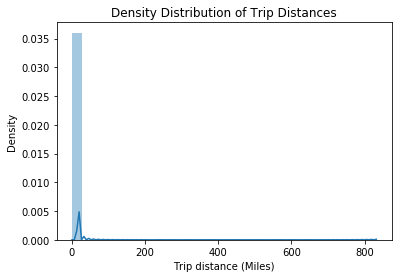

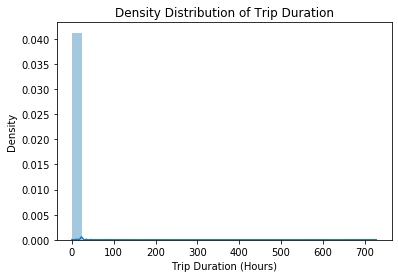

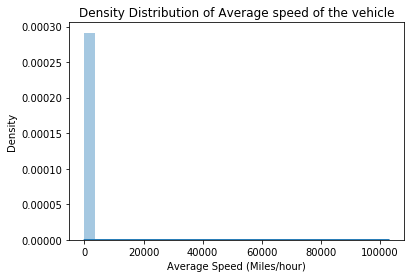

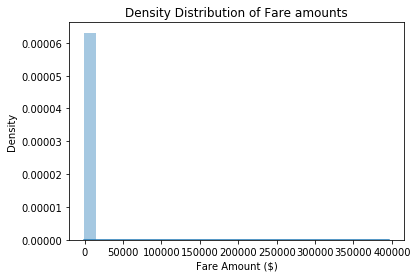

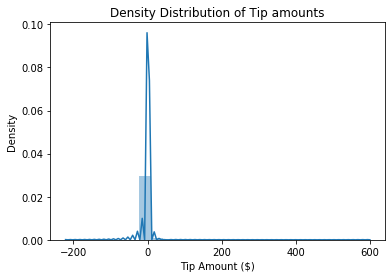

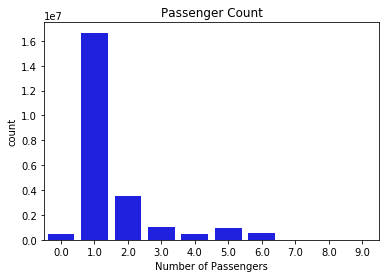

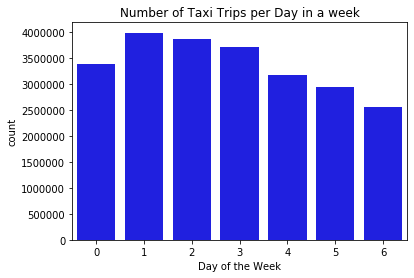

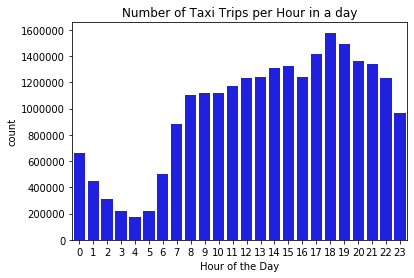

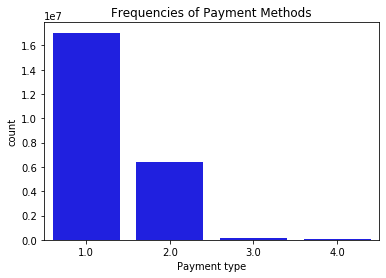

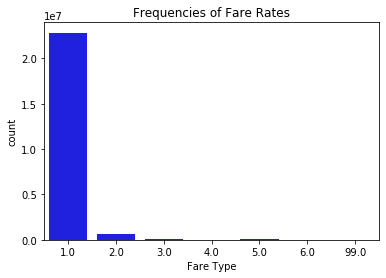

In [16]:
# Prelimnary Analysis of the raw data
N = len(dfy)

sns.distplot(dfy['trip_distance'], bins=30)
plt.title('Density Distribution of Trip Distances')
plt.xlabel('Trip distance (Miles)')
plt.ylabel('Density')
plt.savefig('../plots/trip_distance_freq.png')
plt.show()

sns.distplot(dfy['trip_duration'], bins=30)
plt.title('Density Distribution of Trip Duration')
plt.xlabel('Trip Duration (Hours)')
plt.ylabel('Density')
plt.savefig('../plots/trip_duration_freq.png')
plt.show()

sns.distplot(dfy['average_speed'], bins=30)
plt.title('Density Distribution of Average speed of the vehicle')
plt.xlabel('Average Speed (Miles/hour)')
plt.ylabel('Density')
plt.savefig('../plots/average_speed_freq.png')
plt.show()

sns.distplot(dfy['fare_amount'], bins=sturges(N))
plt.title('Density Distribution of Fare amounts')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Density')
plt.savefig('../plots/fare_amount_freq.png')
plt.show()

sns.distplot(dfy['tip_amount'], bins=sturges(N))
plt.title('Density Distribution of Tip amounts')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Density')
plt.savefig('../plots/tip_amount_freq.png')
plt.show()

sns.countplot(dfy['passenger_count'], color = 'blue')
plt.title('Passenger Count')
plt.xlabel('Number of Passengers')
plt.savefig('../plots/passenger_freq.png')
plt.show()

sns.countplot(dfy['day'], color = 'blue')
plt.title('Number of Taxi Trips per Day in a week')
plt.xlabel('Day of the Week')
plt.savefig('../plots/day_freq.png')
plt.show()

sns.countplot(dfy['hour'], color = 'blue')
plt.title('Number of Taxi Trips per Hour in a day')
plt.xlabel('Hour of the Day')
plt.savefig('../plots/hour_freq.png')
plt.show()

sns.countplot(dfy['payment_type'], color = 'blue')
plt.title('Frequencies of Payment Methods')
plt.xlabel('Payment type')
plt.savefig('../plots/payment_type_freq.png')
plt.show()

sns.countplot(dfy['RatecodeID'], color = 'blue')
plt.title('Frequencies of Fare Rates')
plt.xlabel('Fare Type')
plt.savefig('../plots/fare_type_freq.png')
plt.show()

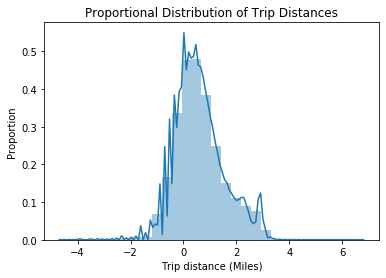

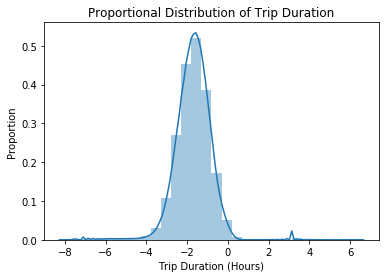

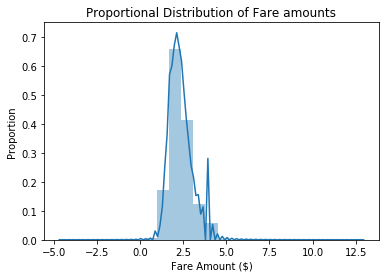

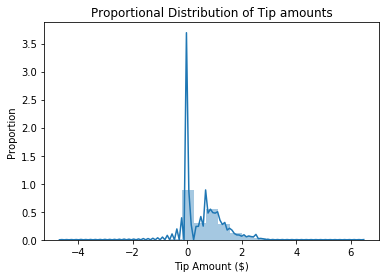

In [18]:
# Prelimnary Analysis of the raw data (logified)
N = len(dfy)

sns.distplot(dfy['trip_distance'].apply(logify), bins=30)
plt.title('Proportional Distribution of Trip Distances')
plt.xlabel('Trip distance (Miles)')
plt.ylabel('Proportion')
plt.savefig('../plots/log_trip_distance_freq.png')
plt.show()

sns.distplot(dfy['trip_duration'].apply(logify), bins=30)
plt.title('Proportional Distribution of Trip Duration')
plt.xlabel('Trip Duration (Hours)')
plt.ylabel('Proportion')
plt.savefig('../plots/log_trip_duration_freq.png')
plt.show()

sns.distplot(dfy['average_speed'].apply(logify), bins=30)
plt.title('Density Distribution of Average speed of the vehicle')
plt.xlabel('Average Speed (Miles/hour)')
plt.ylabel('Density')
plt.savefig('../plots/log_average_speed_freq.png')
plt.show()

sns.distplot(dfy['fare_amount'].apply(logify), bins=sturges(N))
plt.title('Proportional Distribution of Fare amounts')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Proportion')
plt.savefig('../plots/log_fare_amount_freq.png')
plt.show()

sns.distplot(dfy['tip_amount'].apply(logify), bins=sturges(N))
plt.title('Proportional Distribution of Tip amounts')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Proportion')
plt.savefig('../plots/log_tip_amount_freq.png')
plt.show()

In [46]:
# Preprocessing starts

In [ ]:
# check if there are variables with nulls
dfy.isnull().sum()

In [47]:
dfy = dfy[dfy['average_speed'].notnull()]

In [48]:
# since main distribution of is between trip distance is exp(-2) to exp(4), it is approximately
# this excludes any outliers

preprocessed_df = dfy[(dfy['trip_distance'] > 0) & (dfy['trip_distance'] < exp(4))]

In [49]:
preprocessed_df.head()

level_0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
68268     68268       1.0  2019-01-01 07:01:20   2019-01-31 14:29:21   
579459   579459       1.0  2019-01-03 21:43:46   2019-01-03 21:45:47   
579460   579460       1.0  2019-01-03 21:49:22   2019-01-03 21:59:12   
592224   592224       1.0  2019-01-03 22:04:40   2019-01-03 22:16:15   
592225   592225       1.0  2019-01-03 22:24:36   2019-01-27 10:41:17   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
68268               1.0            1.2         1.0                  N   
579459              1.0            0.6         1.0                  N   
579460              1.0            2.2         1.0                  N   
592224              1.0            2.5         1.0                  N   
592225              1.0            1.1         1.0                  N   

        PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
68268             48           163  ...      0.5        0.00           0.0   
579459           263           141  ...      0.5        1.50           0.0   
579460           263           151  ...      0.5        1.00           0.0   
592224           238           246  ...      0.5        2.35           0.0   
592225            50           170  ...      0.5        1.85           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
68268                     0.3          7.30                   0.0   
579459                    0.3          6.30                   0.0   
579460                    0.3         11.80                   0.0   
592224                    0.3         14.15                   0.0   
592225                    0.3         11.15                   0.0   

        trip_duration  average_speed  day  hour  
68268      727.466944       0.001650    1     7  
579459       0.033611      17.851240    3    21  
579460       0.163889      13.423729    3    21  
592224       0.193056      12.949640    3    22  
592225     564.278056       0.001949    3    22  

[5 rows x 23 columns]

In [50]:
# max RatecodeID shouldn't be 99. Max should be 6.
# negative fare amount and other variables regarding money. initial charge is $2.5
# passenger count cannot be 0, passenger count cannot exceed 4
# trip distance shouldn't be too large, which may be an outlier. nyc area is 783.8km^2 which is around 302.62687 square miles
# max fare amount being $187439 is an outlier, find a suitable 
# Someone tipped $1001
# average speed of car should not be over 25mph

In [51]:
preprocessed_df['RatecodeID'].value_counts()

1.0     22725375
2.0       611805
5.0        72135
3.0        50431
4.0        19152
99.0         499
6.0           62
Name: RatecodeID, dtype: int64

In [52]:
# remove ratecodes with 99.0
preprocessed_df = preprocessed_df[(preprocessed_df['RatecodeID'] == 1) | (preprocessed_df['RatecodeID'] == 2)]

preprocessed_df['RatecodeID'].value_counts()

1.0    22725375
2.0      611805
Name: RatecodeID, dtype: int64

In [53]:
# check what passenger number is viable
preprocessed_df['passenger_count'].value_counts()

1.0    16409902
2.0     3515831
3.0      992133
5.0      950874
6.0      567228
4.0      474715
0.0      426480
7.0          11
9.0           4
8.0           2
Name: passenger_count, dtype: int64

In [54]:
# Make passengers less than 7 and more than 0
preprocessed_df = preprocessed_df[(preprocessed_df['passenger_count'] < 7) &(preprocessed_df['passenger_count'] > 0)]

In [55]:
# Fare amount should be more than $2.5
preprocessed_df = preprocessed_df[preprocessed_df['fare_amount'] > 2.5]

In [56]:
# fare_amount should be less than around exp(5)
preprocessed_df = preprocessed_df[preprocessed_df['fare_amount'] < exp(5)]

In [57]:
# tip amount should be less than around exp(3)
preprocessed_df = preprocessed_df[preprocessed_df['tip_amount'] < exp(3)]

In [58]:
preprocessed_df.head()

level_0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
68268     68268       1.0  2019-01-01 07:01:20   2019-01-31 14:29:21   
579459   579459       1.0  2019-01-03 21:43:46   2019-01-03 21:45:47   
579460   579460       1.0  2019-01-03 21:49:22   2019-01-03 21:59:12   
592224   592224       1.0  2019-01-03 22:04:40   2019-01-03 22:16:15   
592225   592225       1.0  2019-01-03 22:24:36   2019-01-27 10:41:17   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
68268               1.0            1.2         1.0                  N   
579459              1.0            0.6         1.0                  N   
579460              1.0            2.2         1.0                  N   
592224              1.0            2.5         1.0                  N   
592225              1.0            1.1         1.0                  N   

        PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
68268             48           163  ...      0.5        0.00           0.0   
579459           263           141  ...      0.5        1.50           0.0   
579460           263           151  ...      0.5        1.00           0.0   
592224           238           246  ...      0.5        2.35           0.0   
592225            50           170  ...      0.5        1.85           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
68268                     0.3          7.30                   0.0   
579459                    0.3          6.30                   0.0   
579460                    0.3         11.80                   0.0   
592224                    0.3         14.15                   0.0   
592225                    0.3         11.15                   0.0   

        trip_duration  average_speed  day  hour  
68268      727.466944       0.001650    1     7  
579459       0.033611      17.851240    3    21  
579460       0.163889      13.423729    3    21  
592224       0.193056      12.949640    3    22  
592225     564.278056       0.001949    3    22  

[5 rows x 23 columns]

In [59]:
# average speed should be less than around exp(3.75)
preprocessed_df = preprocessed_df[preprocessed_df['average_speed'] < exp(3.75)]

In [60]:
preprocessed_df['payment_type'].value_counts()

1.0    16491690
2.0     6197735
3.0       74748
4.0       23933
Name: payment_type, dtype: int64

In [62]:
# Only use payment 1: tip amounts only come with credit card transactions (later revealed in descriptive statistics)

preprocessed_df = preprocessed_df[preprocessed_df['payment_type'] == 1]
preprocessed_df['payment_type'].value_counts()

1.0    16491690
Name: payment_type, dtype: int64

In [33]:
preprocessed_df['day'].value_counts()

1    3847350
2    3719280
3    3584776
0    3258367
4    3048622
5    2838906
6    2454622
Name: day, dtype: int64

In [34]:
preprocessed_df['congestion_surcharge'].value_counts()

2.50    18625846
0.00     4125616
0.75         244
2.75         214
0.50           3
Name: congestion_surcharge, dtype: int64

In [35]:
preprocessed_df['mta_tax'].value_counts()

0.50     22749927
0.00         1919
0.25           40
0.35           21
3.30           11
0.60            1
0.08            1
27.45           1
6.80            1
19.42           1
Name: mta_tax, dtype: int64

In [36]:
preprocessed_df['improvement_surcharge'].value_counts()

0.3    22749792
0.0        2130
1.0           1
Name: improvement_surcharge, dtype: int64

In [37]:
# Drop variables deemed unnecessary

preprocessed_df = preprocessed_df.drop('mta_tax', axis = 1);
preprocessed_df = preprocessed_df.drop('congestion_surcharge', axis = 1);
preprocessed_df = preprocessed_df.drop('improvement_surcharge', axis = 1);
preprocessed_df = preprocessed_df.drop('VendorID', axis = 1);
preprocessed_df = preprocessed_df.drop('store_and_fwd_flag', axis = 1);

#get rid of random 'level_0' column
#preprocessed_df = preprocessed_df.drop('level_0', axis = 1);

In [38]:
preprocessed_df.tail()

level_0 tpep_pickup_datetime tpep_dropoff_datetime  \
28578513  28578513  2019-10-31 23:45:44   2019-11-01 00:19:07   
28578514  28578514  2019-10-31 23:16:13   2019-10-31 23:26:28   
28578515  28578515  2019-10-31 23:33:26   2019-10-31 23:49:39   
28578516  28578516  2019-10-31 23:57:00   2019-11-01 00:15:54   
28578517  28578517  2019-10-31 23:46:11   2019-11-01 00:29:35   

          passenger_count  trip_distance  RatecodeID  PULocationID  \
28578513              1.0          12.80         1.0           133   
28578514              1.0           2.13         1.0           239   
28578515              2.0           5.59         1.0           236   
28578516              4.0           2.38         1.0            79   
28578517              1.0          19.03         2.0           132   

          DOLocationID  payment_type  fare_amount  extra  tip_amount  \
28578513           234           2.0         38.5    3.0        0.00   
28578514           141           2.0         10.0    0.5        0.00   
28578515           148           1.0         19.0    0.5        4.56   
28578516           100           1.0         13.5    0.5        3.46   
28578517            48           2.0         52.0    0.0        0.00   

          tolls_amount  total_amount  trip_duration  average_speed  day  hour  
28578513           0.0         42.30       0.556389      23.005492    3    23  
28578514           0.0         13.80       0.170833      12.468293    3    23  
28578515           0.0         27.36       0.270278      20.682425    3    23  
28578516           0.0         20.76       0.315000       7.555556    3    23  
28578517           0.0         55.30       0.723333      26.308756    3    23

In [39]:
# Add the weather external dataset

w1 = pd.read_csv("../raw_data/weather/weather_2019-01.csv")
w2 = pd.read_csv("../raw_data/weather/weather_2019-04.csv")
w3 = pd.read_csv("../raw_data/weather/weather_2019-07.csv")
w4 = pd.read_csv("../raw_data/weather/weather_2019-10.csv")
weather = pd.concat([w1,w2,w3,w4]).reset_index()


weather['date'] = pd.to_datetime(weather['date']).dt.date


# Only the average_temp (Fahrenheit) and precipitation (inches) will be used:
weather = weather[['date','avg_temp', 'precipitation']]

print(weather['precipitation'].value_counts())

# Change T (trace of rain) as 0 to categorize it.
weather['precipitation'].replace('T', 0, inplace = True)

# Make it's raining: 1 not raining: 0
rain_level = [0,1]

# Make it's cold: <46, it's not cold >46
temp_level = [0,1]
weather['precipitation'] = weather['precipitation'].astype(float)
weather['precipitation'] = pd.cut(weather['precipitation'], bins=[-float('inf'), 0, float('inf')], labels=rain_level)
weather['avg_temp'] = pd.cut(weather['avg_temp'], bins=[-float('inf'), 46, float('inf')], labels=temp_level)


preprocessed_df['date'] = preprocessed_df['tpep_pickup_datetime'].dt.date
preprocessed_df.tail()
merged_df = pd.merge(preprocessed_df, weather, how = 'left', on = 'date').drop('date', axis =1)
merged_df[merged_df.isna().any(axis=1)]

# We find that dates that are not included in the months e.g there are some december dates. Hence, they are excluded
# using dropna()


0       55
T       14
0.01    11
0.02     4
0.06     3
0.54     3
0.04     2
0.07     2
0.24     2
0.2      2
0.03     2
0.51     1
1.03     1
0.5      1
0.79     1
1.83     1
0.26     1
0.96     1
1.38     1
0.57     1
0.7      1
0.23     1
0.08     1
0.36     1
1.33     1
0.63     1
0.88     1
0.29     1
0.05     1
0.17     1
1.82     1
1.66     1
0.34     1
0.53     1
Name: precipitation, dtype: int64


level_0 tpep_pickup_datetime tpep_dropoff_datetime  \
673210     5545584  2009-01-01 00:49:35   2009-01-01 01:07:32   
779947     5657400  2008-12-31 23:09:10   2008-12-31 23:38:34   
919192     5803000  2008-12-31 23:15:41   2009-01-01 23:06:20   
1102054    5995166  2009-01-01 00:47:05   2009-01-01 17:18:13   
1114379    6008140  2008-12-31 23:04:37   2009-01-01 17:36:02   
...            ...                  ...                   ...   
22749332  28575793  2019-11-01 00:07:54   2019-11-01 00:13:02   
22750385  28576892  2019-11-01 00:00:09   2019-11-01 00:14:32   
22750509  28577025  2019-11-01 00:01:59   2019-11-01 00:13:17   
22751196  28577754  2019-11-01 00:02:44   2019-11-01 00:21:17   
22751820  28578408  2019-11-01 00:00:03   2019-11-01 00:08:39   

          passenger_count  trip_distance  RatecodeID  PULocationID  \
673210                1.0          10.44         1.0           132   
779947                1.0           3.22         1.0           137   
919192                1.0          12.70         1.0           132   
1102054               1.0          14.69         1.0           132   
1114379               1.0           0.59         1.0           237   
...                   ...            ...         ...           ...   
22749332              1.0           0.90         1.0           100   
22750385              1.0           1.02         1.0            79   
22750509              1.0           1.43         1.0           107   
22751196              2.0           9.63         1.0            48   
22751820              5.0           1.80         1.0             7   

          DOLocationID  payment_type  fare_amount  extra  tip_amount  \
673210              39           1.0         29.0    0.5        6.06   
779947             142           2.0         17.5    0.0        0.00   
919192             181           2.0         40.0    0.5        0.00   
1102054             49           1.0         53.0    1.0       10.96   
1114379            163           1.0          6.5    1.0        1.00   
...                ...           ...          ...    ...         ...   
22749332           170           2.0          5.5    0.5        0.00   
22750385           113           1.0         10.0    0.5        2.76   
22750509           186           1.0          8.5    0.5        3.08   
22751196           127           1.0         27.5    0.5        6.26   
22751820           260           2.0          8.5    0.5        0.00   

          tolls_amount  total_amount  trip_duration  average_speed  day  hour  \
673210             0.0         36.36       0.299167      34.896936    3     0   
779947             0.0         18.30       0.490000       6.571429    2    23   
919192             0.0         41.30      23.844167       0.532625    2    23   
1102054            0.0         65.76      16.518889       0.889285    3     0   
1114379            0.0          9.30      18.523611       0.031851    2    23   
...                ...           ...            ...            ...  ...   ...   
22749332           0.0          9.30       0.085556      10.519481    4     0   
22750385           0.0         16.56       0.239722       4.254925    4     0   
22750509           0.0         15.38       0.188333       7.592920    4     0   
22751196           0.0         37.56       0.309167      31.148248    4     0   
22751820           0.0          9.80       0.143333      12.558140    4     0   

         avg_temp precipitation  
673210        NaN           NaN  
779947        NaN           NaN  
919192        NaN           NaN  
1102054       NaN           NaN  
1114379       NaN           NaN  
...           ...           ...  
22749332      NaN           NaN  
22750385      NaN           NaN  
22750509      NaN           NaN  
22751196      NaN           NaN  
22751820      NaN           NaN  

[941 rows x 20 columns]

In [40]:
merged_df = merged_df.drop('tpep_pickup_datetime', axis = 1);
merged_df = merged_df.drop('tpep_dropoff_datetime', axis = 1);
merged_df = merged_df.dropna()

In [41]:
merged_df.shapes

(22750982, 18)

In [43]:
merged_df.reset_index().to_feather('../preprocessed_data/final_yellow-2019.feather')